# Netfilx Movies and TV Shows early 2021 EDA

In the following notebook, I am going to have Exploratory Data Analysis or EDA.

Each calculation and analysis has a comprehensive description, and each part has a summary and a brief conclusion

Implemented methods

Some of the implemented methods in this notebook are as follows;

- Grouping dataset
- Pivoting
- Reviewing the missing values
- Imputation
- Changing data type
- Statistical distributions
- Outlier detection
- WordCloud

## Table of Contents
1. Importing libaries
2. Importing data
3. EDA

### 1. Importing libaries

In [1]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import textwrap as wrap
import matplotlib.pyplot as plt
import wordcloud as WorldCloud

### 2. Importing dataset

In [3]:
data = pd.read_csv('netflixds.csv')
    

**2.1 Dataset overview**

In [4]:
data.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


**2.1.1 Data info**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [6]:
data.describe().T.style.bar()

,count,mean,std,min,25%,50%,75%,max
Release Date,5964.000000,2015.643863,7.257391,1925.000000,2015.000000,2018.000000,2019.000000,2021.000000


**2.2 Missing values**

In [7]:
null = data.isnull().sum()
null

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

**2.2.1 Visualising the null values**

<AxesSubplot:>

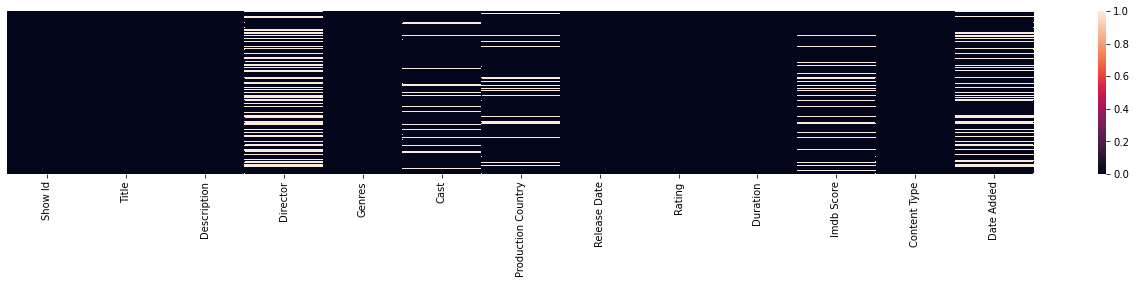

In [8]:
plt.figure(figsize=(23, 3))
sns.heatmap(data.isnull(), yticklabels=False, cbar=True)

As the above table and following plot illustrates, there are too many null values in this dataset.

In [9]:
total_null = null.sort_values(ascending=False)
perc = (null / data.isnull().count()).sort_values(ascending=False)
total = pd.concat([total_null, perc], axis=1, keys=['Total null values','Percentages of null values'])
total.T.style.bar()

,Director,Date Added,Imdb Score,Production Country,Cast,Rating,Release Date,Duration,Show Id,Title,Description,Genres,Content Type
Total null values,2064.000000,1335.000000,608.000000,559.000000,530.000000,4.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percentages of null values,0.345902,0.223731,0.101894,0.093682,0.088822,0.000670,0.000503,0.000503,0.000000,0.000000,0.000000,0.000000,0.000000


**2.2.2 Identifying datatype**

In [10]:
num_col = data._get_numeric_data().columns.tolist()
print(num_col)

['Release Date']


In [11]:
cat_col = set(data.columns) - set(num_col)
print(cat_col)

{'Imdb Score', 'Date Added', 'Production Country', 'Genres', 'Rating', 'Description', 'Title', 'Cast', 'Content Type', 'Duration', 'Director', 'Show Id'}


**2.2.3 Impute Missing Values**

One approach would be replacing the missing values with sensible values. For the text datatype, I used the high frequent values and for integers, I used the average of the feature

In [12]:
for i in cat_col :
    data[i].fillna(data[i].mode()[0], inplace=True)
for i in num_col :
    data[i].fillna(data[i].mean(), inplace=True)

In [13]:
data.isnull().sum()

Show Id               0
Title                 0
Description           0
Director              0
Genres                0
Cast                  0
Production Country    0
Release Date          0
Rating                0
Duration              0
Imdb Score            0
Content Type          0
Date Added            0
dtype: int64

**2.3 Feature Engineering**

First of all, I am going to explore each feature separately to know the dataset better.

For the each feature, I am using a different method to modify them and to have a more clean notebook, I do not print the modified feature

In [14]:
data['Title'] = data['Title'].str.replace('#', '')

Converting Imdb Score to numerical values

In [15]:
data['Imdb Score'] = data['Imdb Score'].str.replace('/10', '')

In [16]:
data['Imdb Score'] = data['Imdb Score'].apply(pd.to_numeric)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            5967 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5967 non-null   object 
 6   Production Country  5967 non-null   object 
 7   Release Date        5967 non-null   float64
 8   Rating              5967 non-null   object 
 9   Duration            5967 non-null   object 
 10  Imdb Score          5967 non-null   float64
 11  Content Type        5967 non-null   object 
 12  Date Added          5967 non-null   object 
dtypes: float64(2), object(11)
memory usage: 606.1+ KB


As we can see column 'Imdb Score' is changed.

**2.4 Statistical Report**

Due to the high dimension of the dataset, I am analyzing the random sample of the collection

In [18]:
sample = data.sample(n=100)

Text(0, 0.5, 'Number of Genres')

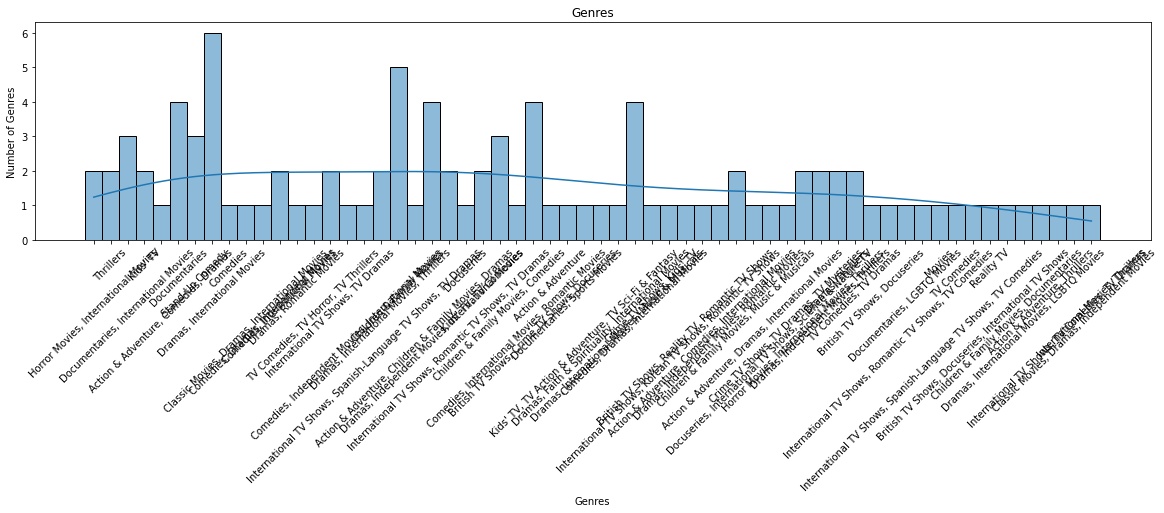

In [19]:
fig = plt.figure(figsize=(20, 4))
ax = plt.axes()
plt.title('Genres')
sns.histplot(sample['Genres'], kde=True)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel('Genres')
plt.ylabel('Number of Genres')

**Studying the IMDB Score**

Text(3, 7, 'Skewness coeff. is:-0.7801998787680353')

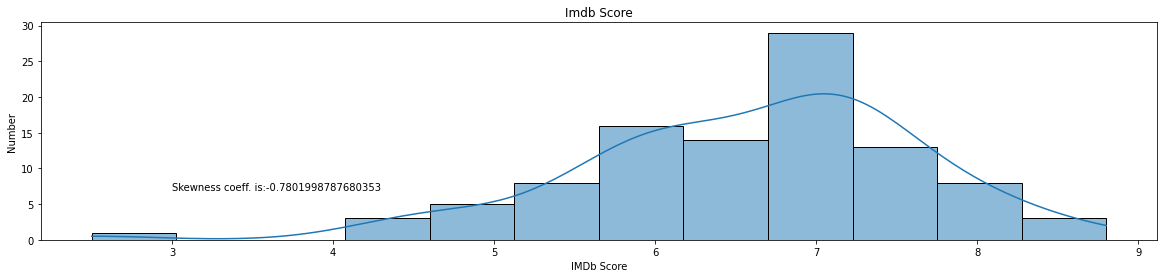

In [20]:
fig = plt.figure(figsize=(20, 4))
ax = plt.axes()
plt.title('Imdb Score')
sns.histplot(sample['Imdb Score'], kde=True)
plt.xlabel('IMDb Score')
plt.ylabel('Number')
plt.text(3,7, 'Skewness coeff. is:' + str(data['Imdb Score'].skew()))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcacbfe1070>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcacbfe1730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcacbfd2cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcacbfe1df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcacbfeb4f0>],
 'means': [<matplotlib.lines.Line2D at 0x7fcacbfeb190>]}

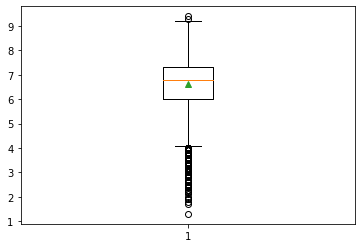

In [21]:
plt.boxplot(data['Imdb Score'], 0, 'o',showbox=True,
           showfliers=True, showcaps=True, showmeans=True)

The box plot illustrates the outliers of the dataset regarding the IMDB score

<AxesSubplot:xlabel='Content Type', ylabel='count'>

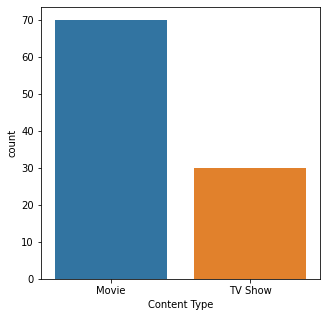

In [22]:
import warnings
warnings.simplefilter('ignore')
fig = plt.figure(figsize=(5, 5))
ax=plt.axes()
sns.countplot(sample['Content Type'])

Text(0, 0.5, 'Number')

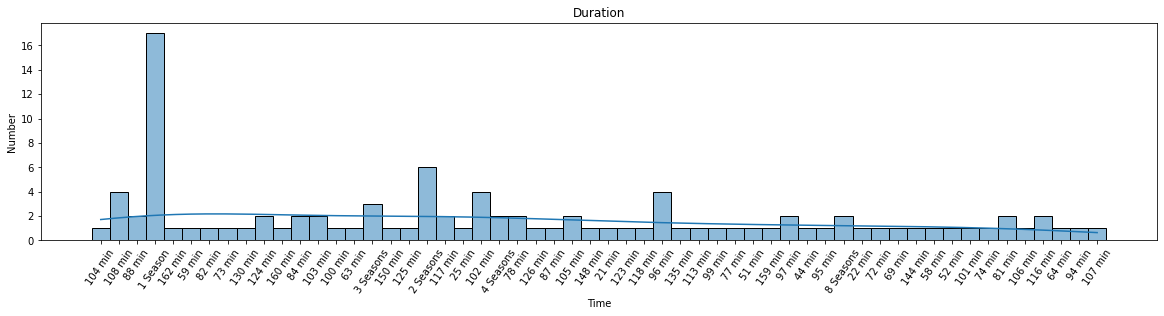

In [23]:
fig = plt.figure(figsize=(20, 4))
ax = plt.axes()
plt.title('Duration')
sns.histplot(sample['Duration'], kde=True)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xlabel('Time')
plt.ylabel('Number')

From the histograms and count plots, we observe that the US has made most of the movies and series on Netflix. And the distribution of the IMDb score is almost normal with the calculated skewness. The time duration and number of TV shows against the series are also studies.






**Studying the IMDb score against Rating**

In [24]:
pd.crosstab(index=sample['Rating'], columns=[sample['Imdb Score']],
           margins=True).style.background_gradient(cmap='PuBu')

Imdb Score,2.5,4.3,4.5,4.7,4.9,5.0,5.3,5.4,5.5,5.6,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.6,8.8,All
Rating,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PG,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
PG-13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
R,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,5
TV-14,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,3,1,5,1,2,0,1,0,1,0,1,1,1,0,0,0,0,26
TV-G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TV-MA,0,1,1,2,0,0,0,2,0,0,2,2,2,2,1,2,0,0,2,1,0,3,2,3,0,3,1,1,1,0,2,0,0,1,0,1,1,39
TV-PG,0,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,10
TV-Y,0,1,0,0,0,1,0,0,1,3,0,0,0,0,0,1,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
TV-Y7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2



**Studying the IMDb score against Production Country**

In [25]:
pd.DataFrame(data.groupby('Production Country')['Imdb Score'].mean()).sort_values(ascending=False, by='Imdb Score')

,Imdb Score
Production Country,
"Ireland, United States, United Kingdom",8.7
"United States, Colombia, Mexico",8.7
"Romania, United Kingdom",8.6
"United Kingdom, United States, Japan",8.6
"United Kingdom, France, Poland, Germany, United States",8.6
...,...
Jordan,3.4
"United States, India, South Korea, China",3.3
Bulgaria,3.2


The highest rate of IMDb goes to Ireland, United States, annd United Kingdom production.


**Studying the Release Date**

In [26]:
pd.crosstab(index=sample['Content Type'], columns=[sample['Release Date']],
           margins=True).style.background_gradient(cmap='PuBu')

Release Date,1970.0,1977.0,1979.0,1989.0,1991.0,1992.0,1995.0,1998.0,2001.0,2002.0,2003.0,2004.0,2005.0,2007.0,2009.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,All
Content Type,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,1,1,1,1,1,1,1,1,0,1,1,1,0,1,2,1,0,4,3,4,7,12,12,11,2,70
TV Show,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,4,1,2,6,4,4,4,30
All,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,5,7,5,9,18,16,15,6,100



**Studying the directors works**

In [27]:
(pd.DataFrame(data.groupby(data['Director'])['Release Date'].count())).sort_values(ascending=False, by='Release Date')

,Release Date
Director,
"Raúl Campos, Jan Suter",2082
Marcus Raboy,16
Suhas Kadav,15
Jay Karas,14
Cathy Garcia-Molina,12
...,...
Jacob Kornbluth,1
Jacob LaMendola,1
Jadesola Osiberu,1


Raúl Campos, Jan Suter have top score in terms of producing movies.


**Checkout the titles**

In [28]:
Titles = (sample['Title']).values
Title = " ".join(i for i in Titles)
fig = plt.figure(figsize=(10, 10))
for i in range(4):
    wordcloud = WordCloud(width=400, height=400, max_font_size=50,
                         max_words=70, colormap="Dark2"). generate(Title).generate(Title)
    plt.subplot(2,2, i+1)
    plt.title('Title of Movies')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

NameError: name 'WordCloud' is not defined

<Figure size 720x720 with 0 Axes>